In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
# We have imported all dependencies

In [455]:
data = pd.read_csv('Data_Holland/mwl526_RA.csv')
data = pd.DataFrame(data)
#data=pd.concat([data,data,data,data,data,data,data,data,data,data,data,data,data])
print(data.shape)
data.head()

(9027, 14)


,Pmin,Pmax,Pavg,Pref,Pcmin,Pcavg,Pcmax,Amin,Aavg,Amax,Ramin,Ramax,Ravg,Rain
0,-48,-47,-47.5,-47.50,-47.50,-47.50,-47.50,0.0,0.0,0.0,1.50,1.50,1.50,0.0
1,-47,-47,-47.0,-47.25,-47.25,-47.25,-47.25,0.0,0.0,0.0,1.25,1.25,1.25,0.0
2,-47,-47,-47.0,-47.00,-47.00,-47.00,-47.00,0.0,0.0,0.0,1.00,1.00,1.00,0.0
3,-47,-47,-47.0,-47.00,-47.00,-47.00,-47.00,0.0,0.0,0.0,1.00,1.00,1.00,0.0
4,-47,-47,-47.0,-47.00,-47.00,-47.00,-47.00,0.0,0.0,0.0,1.00,1.00,1.00,0.0


In [456]:
xpts=np.array(data['Ramin'])
ypts=np.array(data['Ravg'])
zpts=np.array(data['Ramax'])

apts=np.array(data['Pmin'])
bpts=np.array(data['Pavg'])
cpts=np.array(data['Pmax'])

X=np.vstack((xpts,ypts,zpts,apts,bpts,cpts))
X=X.T

y=np.array(data['Rain'])
y=np.vstack((y))
X.shape

(9027, 6)

In [457]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [458]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [459]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -0.07 (0.12) MSE


In [460]:
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

In [446]:
for i in range(prediction.shape[0]):
    if (prediction[i]<0):
        prediction[i]=0

In [447]:
np.corrcoef(y_test.T,prediction.T)

array([[1.        , 0.62310197],
       [0.62310197, 1.        ]])

In [449]:
np.corrcoef(y.T,ypts.T)

array([[1.        , 0.46320761],
       [0.46320761, 1.        ]])

In [450]:
MSE = mean_squared_error(y_test , prediction)
MAE = mean_absolute_error(y_test , prediction)
print('MAE = ',MAE)
print('MSE = ',MSE)

MAE =  0.37890112934265535
MSE =  1.355783091252203


In [451]:
print(np.mean(y_test))
print(np.mean(prediction))

0.47021390374331545
0.39022836


Text(0, 0.5, 'Predictions (rainfall depths in mm)')

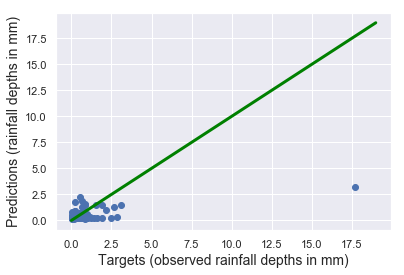

In [453]:
plt.scatter(y_test,prediction)
#plt.plot(y_test,yhat_test)
ab=ordo=range(0,20)
fig=plt.plot(ab,ordo,lw=3,c='green')
plt.xlabel('Targets (observed rainfall depths in mm)',size=14)
plt.ylabel('Predictions (rainfall depths in mm)',size=14)
#plt.savefig('NNR526.eps')

Text(0.5, 0, 'Observed rainfall depths')

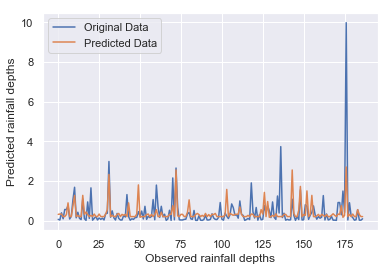

In [397]:
plt.plot(y_test,label="Original Data")
plt.plot(prediction,label="Predicted Data")
    
plt.legend(loc='best')
plt.ylabel('Predicted rainfall depths')
plt.xlabel('Observed rainfall depths')
#plt.title('Rain rate plot')
#plt.savefig('plot526.eps')
#plt.show()

In [265]:
np.sum(prediction<0)

0